In [1]:
import sys
sys.path.append('C:/Users/KimDongyoung/Desktop/Github/my_git/mygit/DEEPLEARNING/밑바닥부터시작하는딥러닝2')

In [2]:
import numpy as np 
from common.layers import *
from ch01.two_layer_net import TwoLayerNet
from spiral import load_data
from common.optimizer import SGD
import matplotlib.pyplot as plt
import sys
# sys.path.append("C:/Users/KimDongyoung/Desktop/Github/my_git/mygit/DEEPLEARNING/밑바닥부터시작하는딥러닝2/spiral.py")

In [3]:
# spiral 데이터셋을 생성하는 코드
def load_data(seed=1984):
    np.random.seed(seed)
    N = 100  # 클래스당 샘플 수
    DIM = 2  # 데이터 요소 수
    CLS_NUM = 3  # 클래스 수

    x = np.zeros((N*CLS_NUM, DIM))
    t = np.zeros((N*CLS_NUM, CLS_NUM), dtype=int)  # 여기서 np.int를 int로 변경

    for j in range(CLS_NUM):
        for i in range(N):
            rate = i / N
            radius = 1.0 * rate
            theta = j * 4.0 + 4.0 * rate + np.random.randn() * 0.2
            ix = N * j + i
            x[ix] = np.array([radius * np.sin(theta), radius * np.cos(theta)]).flatten()
            t[ix, j] = 1

    return x, t

| 에폭 1 |  반복 10 / 10 | 손실 1.13
| 에폭 2 |  반복 10 / 10 | 손실 1.13
| 에폭 3 |  반복 10 / 10 | 손실 1.12
| 에폭 4 |  반복 10 / 10 | 손실 1.12
| 에폭 5 |  반복 10 / 10 | 손실 1.11
| 에폭 6 |  반복 10 / 10 | 손실 1.14
| 에폭 7 |  반복 10 / 10 | 손실 1.16
| 에폭 8 |  반복 10 / 10 | 손실 1.11
| 에폭 9 |  반복 10 / 10 | 손실 1.12
| 에폭 10 |  반복 10 / 10 | 손실 1.13
| 에폭 11 |  반복 10 / 10 | 손실 1.12
| 에폭 12 |  반복 10 / 10 | 손실 1.11
| 에폭 13 |  반복 10 / 10 | 손실 1.09
| 에폭 14 |  반복 10 / 10 | 손실 1.08
| 에폭 15 |  반복 10 / 10 | 손실 1.04
| 에폭 16 |  반복 10 / 10 | 손실 1.03
| 에폭 17 |  반복 10 / 10 | 손실 0.96
| 에폭 18 |  반복 10 / 10 | 손실 0.92
| 에폭 19 |  반복 10 / 10 | 손실 0.92
| 에폭 20 |  반복 10 / 10 | 손실 0.87
| 에폭 21 |  반복 10 / 10 | 손실 0.85
| 에폭 22 |  반복 10 / 10 | 손실 0.82
| 에폭 23 |  반복 10 / 10 | 손실 0.79
| 에폭 24 |  반복 10 / 10 | 손실 0.78
| 에폭 25 |  반복 10 / 10 | 손실 0.82
| 에폭 26 |  반복 10 / 10 | 손실 0.78
| 에폭 27 |  반복 10 / 10 | 손실 0.76
| 에폭 28 |  반복 10 / 10 | 손실 0.76
| 에폭 29 |  반복 10 / 10 | 손실 0.78
| 에폭 30 |  반복 10 / 10 | 손실 0.75
| 에폭 31 |  반복 10 / 10 | 손실 0.78
| 에폭 32 |  반복 10 

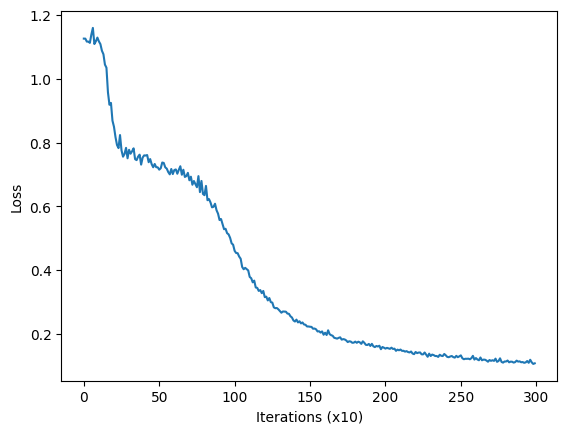

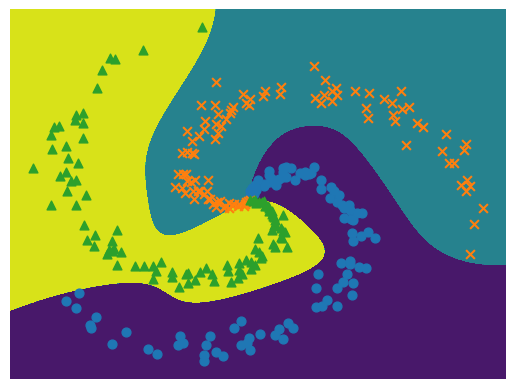

In [4]:
# 하이퍼 파라미터 설정
max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

x, t = load_data() # x는 2차원 데이터이다. 300개의 데이터가 있고 각 데이터는 2차원이다. t는 3차원 데이터이다. 정답에 해당하는 요소만 1이고 나머지는 0이다.
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3) # input_size=2, hidden_size=hidden_size, output_size=3
optimizer = SGD(lr=learning_rate) # 학습률이 0.01인 SGD를 사용한다.

# 학습에 사용하는 변수
data_size = len(x)
max_iters = data_size // batch_size # 300 // 30 = 10
total_loss = 0
loss_count = 0
loss_list = []

for epoch in range(max_epoch):
  # 데이터 뒤섞기
  idx = np.random.permutation(data_size) # 데이터의 인덱스를 뒤섞는다.
  x = x[idx]
  t = t[idx]

  for iters in range(max_iters):
    batch_x = x[iters*batch_size:(iters+1)*batch_size] # 0:30, 30:60, 60:90, ... 270:300
    batch_t = t[iters*batch_size:(iters+1)*batch_size] # 0:30, 30:60, 60:90, ... 270:300

    # 기울기를 구해 매개변수 갱신
    loss = model.forward(batch_x, batch_t) # 손실을 구한다.
    model.backward() # 역전파를 통해 기울기를 구한다. 기울기는 models.grads에 저장된다.
    optimizer.update(model.params, model.grads) # SGD를 사용해 가중치를 갱신한다. model.g  갱신된 가중치는 model.params에 저장된다.

    total_loss += loss
    loss_count += 1

    # 정기적으로 학습 경과 출력
    if (iters+1) % 10 == 0:
      avg_loss = total_loss / loss_count
      print('| 에폭 %d |  반복 %d / %d | 손실 %.2f' % (epoch + 1, iters + 1, max_iters, avg_loss))
      loss_list.append(avg_loss)
      total_loss, loss_count = 0, 0
      
# 학습 결과 플롯
plt.plot(np.arange(len(loss_list)), loss_list, label='train')
plt.xlabel('Iterations (x10)')
plt.ylabel('Loss')
plt.show()

# 경계 영역 플롯
h = 0.001
x_min, x_max = x[:, 0].min() - .1, x[:, 0].max() + .1
y_min, y_max = x[:, 1].min() - .1, x[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X = np.c_[xx.ravel(), yy.ravel()]
score = model.predict(X)
predict_cls = np.argmax(score, axis=1)
Z = predict_cls.reshape(xx.shape)
plt.contourf(xx, yy, Z)
plt.axis('off')

# 데이터점 플롯
x, t = load_data()
N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])
plt.show()